In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
df=pd.read_csv('/content/housing.csv')
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
# checking the number of rows and Columns in the data frame
df.shape

(5000, 8)

In [8]:
# check for missing values
df.isnull().sum()

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0
price,0


In [9]:
# statistical measures of the dataset
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06,2.469066e+06


<Axes: >

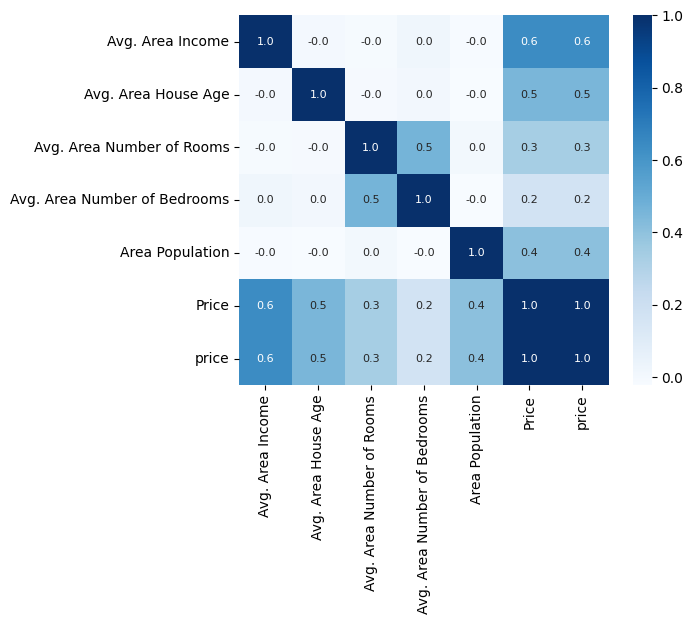

In [11]:
# constructing a heatmap to Understand the correlation
correlation = df.drop('Address', axis=1).corr()
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

--This heatmap shows the correlation between the different features in your dataset and the house prices.


SPILITING DATA INTO TRAINING  AND TESTING DATA

In [12]:
X = df.drop(['price'], axis=1)
Y = df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(5000, 7) (4000, 7) (1000, 7)


MODEL TRAINING

In [15]:
#XGBOOST
# loading the model and fit with training data
model = XGBRegressor()

# Drop the 'Address' column from X_train and X_test before fitting the model
X_train = X_train.drop('Address', axis=1)
X_test = X_test.drop('Address', axis=1)
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

MODEL EVALUATION

In [21]:
# accuracy for prediction on training data
prediction = model.predict(X_train)

# Calculate R-squared error and Mean Absolute Error for training data
training_data_r2_score = metrics.r2_score(Y_train, prediction)
training_data_mae = metrics.mean_absolute_error(Y_train, prediction)

print('R-squared error of the training data:', training_data_r2_score)
print('Mean Absolute Error of the training data:', training_data_mae)

R-squared error of the training data: 0.9999906194477411
Mean Absolute Error of the training data: 838.7104793550772


VISUALIZATION

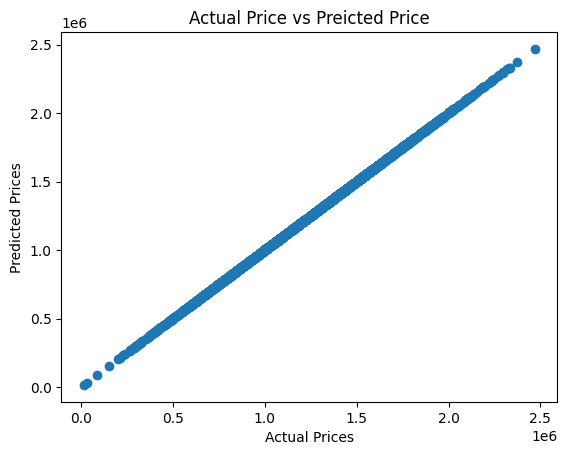

In [22]:
plt.scatter(Y_train,prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

PREDICTION ON TEST DATA

In [23]:
# accuracy for prediction on test data
test_prediction = model.predict(X_test)

In [24]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9994910472342959
Mean Absolute Error :  2871.510434512499


......